<a href="https://colab.research.google.com/github/MustafaShama98/Cloud-Compute/blob/main/Targil_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Copy of Targil 5.ipynb'   students.json    targil-2.ipynb    Untitled0.ipynb
 creds.json		   students.txt     targil-4.ipynb    Untitled1.ipynb
 questions.json		   Targil-1.ipynb  'Targil 6.ipynb'


In [ ]:
# Install the Firebase library
!pip install firebase-admin
# Install required libraries
!pip install python-firebase
!pip install pandas
!pip install matplotlib
!pip install requests beautifulsoup4

In [11]:
import json
def fetch_page(url):
  headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
  }
  response = requests.get(url, headers=headers)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
  else:
    return None

def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())

    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1

    return index

def remove_stop_words(index):
    stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at'}

    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]

    return index

def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}

    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count

    return stemmed_index

def search(query, index):
    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    results = {}
    for word in query_words:
        word = stemmer.stem(word)
        if word in index:
            results[word] = index[word]
    return results

def search_engine(url, query):
    soup = fetch_page(url)
    if soup is None:
        return 0
    index = index_words(soup)
    index = remove_stop_words(index)
    index = apply_stemming(index)
    results = search(query, index)
    return results

import json
from urllib.parse import urljoin
def getIndexing():
  # Base URL for VMware
  base_url = 'https://www.vmware.com/'
  page_content = fetch_page('https://www.vmware.com/products.html')
  # Extracting h5 elements
  h5_elements = page_content.select('h5')

    # Create an empty dictionary to store the results
  result_dict = {}

  # Iterate through each h5 element
  for h5 in h5_elements:
      # Extract the 'a' tag from each h5 element
      a_tag = h5.find('a')

      # Check if 'a' tag is found
      if a_tag:
          # Extract text and href attributes
          text = a_tag.get_text(strip=True)
          href = a_tag['href']

          # Check if the link starts with 'http'
          if href.startswith('http'):
              link = href
          else:
              # If it starts with '/', append the base URL
              link = urljoin(base_url, href)

          # Add the information to the result dictionary
          result_dict[text] = {'Link': link, 'Occurrences': 0}

  # Convert the dictionary to a JSON-formatted string
  json_string = json.dumps(result_dict, indent=2)

  # # Print the JSON object
  # print(json_string)
  return result_dict

In [12]:
import firebase_admin
from firebase_admin import db, credentials
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
import random


# Load Firebase credentials from JSON file
cred_path = '/content/drive/My Drive/Colab Notebooks/creds.json'
if not firebase_admin._apps:
    cred = credentials.Certificate(cred_path)
    firebase_admin.initialize_app(cred,{'databaseURL':'https://cloudcomputing-2bbc8-default-rtdb.europe-west1.firebasedatabase.app/'})




# apps = firebase_admin.get_app(name='[DEFAULT]')
# # Check if there are any initialized apps
# if apps:
#     # Delete the first initialized app (assuming you have only one)
#     firebase_admin.delete_app(apps)
#     print("Firebase app deleted successfully")
# else:
#     print("No Firebase apps to delete")

indexes_with_links = getIndexing()
# Get a list of 10 random indexes
random_indexes = random.sample(indexes_with_links.keys(), 10)

ref = db.reference('/vmware_index_6')

# Retrieve the index data from Firebase
index_data = ref.get()

# Import the random indexes into Firebase
for index in random_indexes:
    data = indexes_with_links[index]

    # Add the index to Firebase
    ref.child(index).set(data)





<ipython-input-12-3aeed7bf6db8>:32: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_indexes = random.sample(indexes_with_links.keys(), 10)


In [14]:
## counts the indexes occurnces

ref = db.reference('/vmware_index_6')

# Retrieve the index data from Firebase
index_data = ref.get()
# Use the search_engine function for each URL and update the 'Occurrences' property
for index in index_data:
    data = index_data[index]
    url = data['Link']
    query = index

    # Use search_engine to get updated occurrences
    results = search_engine(url, query)

    # Check if results is an integer (indicating an error)
    if isinstance(results, int):
        updated_occurrences = 0
    else:
        updated_occurrences = sum(results.values())

    # Update 'Occurrences' in Firebase for the corresponding element
    ref.child(index).update({'Occurrences': updated_occurrences})

# Display the updated Firebase data after updating occurrences
updated_index_data = ref.get()
print(updated_index_data)

{'Carbon Black Workload': {'Link': 'https://www.vmware.com/products/carbon-black-workload.html', 'Occurrences': 97}, 'Empower Frontline Workers': {'Link': 'https://www.vmware.com/solutions/empower-frontline-workers.html', 'Occurrences': 34}, 'Enable Modern Management': {'Link': 'https://www.vmware.com/solutions/modern-endpoint-management.html', 'Occurrences': 55}, 'Modern App Dev Practices': {'Link': 'https://tanzu.vmware.com/app-development', 'Occurrences': 28}, 'Modernize the SOC': {'Link': 'https://www.vmware.com/solutions/modernize-security-operations-center-soc.html', 'Occurrences': 8}, 'Tanzu Application Service': {'Link': 'https://tanzu.vmware.com/application-service', 'Occurrences': 170}, 'Tanzu Mission Control': {'Link': 'https://tanzu.vmware.com/mission-control', 'Occurrences': 208}, 'VMware Data Services Manager': {'Link': 'https://www.vmware.com/products/data-services-manager.html', 'Occurrences': 99}, 'Workspace ONE Freestyle Orchestrator': {'Link': 'https://www.vmware.com

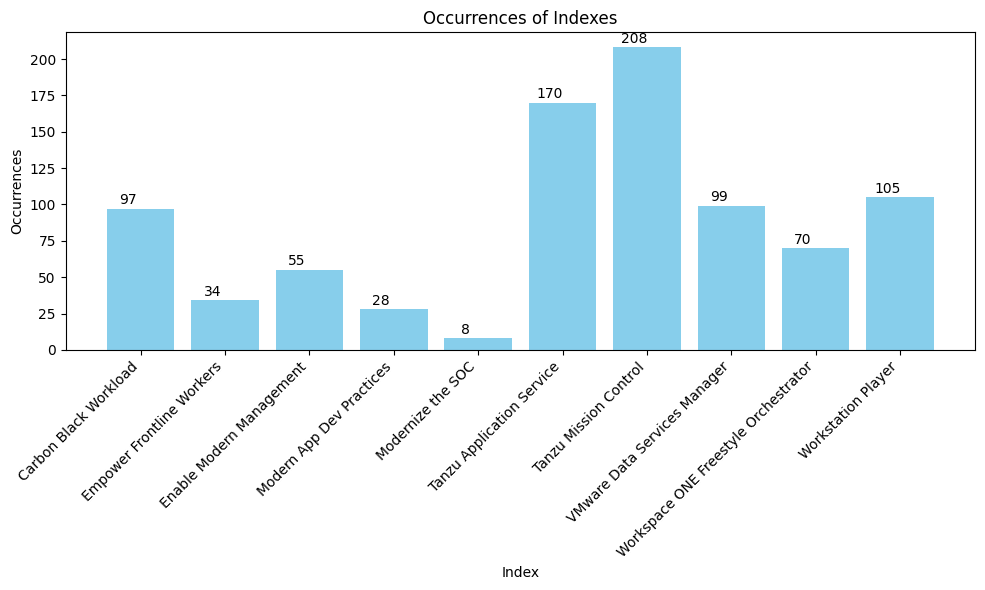

In [16]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt


ref = db.reference('/vmware_index_6')

# Retrieve the index data from Firebase
data = ref.get()
# Convert data to a format suitable for plotting
index_names = list(data.keys())
occurrences_values = [entry['Occurrences'] for entry in data.values()]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(index_names, occurrences_values, color='skyblue')

# Add labels and title
ax.set_xlabel('Index')
ax.set_ylabel('Occurrences')
ax.set_title('Occurrences of Indexes')

# Add data values on top of the bars
for bar, value in zip(bars, occurrences_values):
    ax.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, str(value), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
